# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

## The Central Limit Theorem (CLT) states that the sampling distribution mean approaches a normal distribution as the number of mean samples increases, not overall samples. This holds trupe when sample size is equal to or larger than 30. 
Source: http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#check the column headings and first few lines
print(df.info())
print('-------------')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
-------------
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


## 1) Is the distribution of body temperatures normal?

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

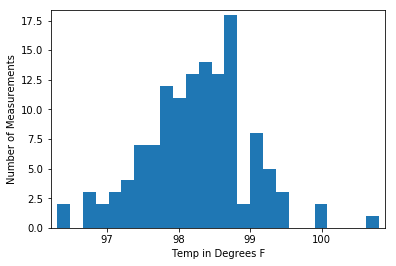

In [4]:
#plot the histogram to inspect the shape of data
_ = plt.hist(df['temperature'], bins = 25)
_ = plt.xlabel('Temp in Degrees F')
_ = plt.ylabel('Number of Measurements')
_ = plt.margins(0.02)
plt.show()

We can see that there are some outliers in this data. Let's look at the Empirical Cumulative Distribution Function (ECDF) of the data and the theoretical data to have a different view.

In [5]:
def ecdf(data):
    n = len(data)
    
    x = np.sort(data)
    
    y = np.arange(1, n + 1) / n
    
    return x, y

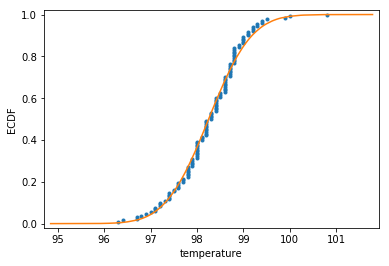

In [6]:
#observed data
x, y = ecdf(df['temperature'])

#theoretical data
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])

samples = np.random.normal(mean, std, size = 1000000)

x_theor, y_theor = ecdf(samples)

#plot the ecdfs of observed and theoretical
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.plot(x_theor, y_theor)
_ = plt.xlabel('temperature')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

We see that they match up very well. We can conclude that the data is indeed normally distributed.

## 2. Is the sample size large? Are the observations independent? 

The sample size is large enough. In the preliminary look of the data I printed the info and head of the dataframe. There are 130 temperature samples and 130 >= 30 (multiple sources say that 30 is a sufficient amount of samples).

The observations are independent because one person's body temperature cannot affect another person's body temperature. They are two, different, closed systems.

## 3. Is the true population mean really 98.6 degrees F?

    a) Would you use a one-sample or two-sample test? Why?
    b) In this situation, is it appropriate to use the τ or z statistic?
    c) Now try using the other test. How is the result be different? Why? 

a) The one-sample test is appropriate. There is one set of data, the temperature and we need only one test statistic.

In [7]:
"""
b) The z statistic is the best option since we know the standard deviation (calculated prior) and the sample size 
is large enough for the CLT to apply. Mean of population = 98.6 and the null-hypothesis is that the temperature mean of the 
population is 98.6
"""
z = (mean - 98.6) / (std / np.sqrt(130))
"""
For calculating the p value, we would use a two-tailed test. We would reject the null hypothesis if the mean much higher 
or lower.
"""
p_z = stats.norm.cdf(z)*2

print(p_z)

4.35231516588e-08


p is much less than 0.05 so we reject the null-hypothesis that the mean temperature of the population is 98.6

In [8]:
"""
c) Now calculate the t statistic and contrast the outcome to the z statistic outcome. The t table is used when the number of
samples is less than thirty. The same equation used for the z statsitc applies, we just compare it to a different table.
"""

t = (mean - 98.6) / (std / np.sqrt(130))

#use the degrees of freedom as the second argument (130-1)
p_t = stats.t.cdf(t, (130-1))*2

print(p_t)

2.18874646241e-07


This value is a magnitude greater in value. The t statistic is only used in cases with small samples. The ends of the distribution have more space as they don't approach 0 as quickly as the z distribution case.

## 4. At what temperature should we consider someone's temperature to be "abnormal"? 
  - Start by computing the margin of error and confidence interval. 

In [9]:
#Use sample stanadard deviation, std, and the number of samples, 130 or len(df['temperature'])
marg_error = 1.96 * std / np.sqrt(len(df['temperature']))

#find the confidence interval by using the norm.interval function with alpha=0.95, loc = mean, scale = std.
CI_95 = stats.norm.interval(0.95, mean, std)

print('Margin of error is:', marg_error)
print('-------------------')
print('95% of normal temperatures should fall in the following range:', CI_95)

Margin of error is: 0.125550964803
-------------------
95% of normal temperatures should fall in the following range: (96.81775582674824, 99.680705711713316)


As per the calculations, it would be concerning if a person's temperature is below 96.8 or higher than 99.7 degrees fahrenheit.

## 5. Is there a significant difference between males and females in normal temperature?
  - What test did you use and why? 

For this question, it would be easiest to perform a two sample test. We are looking for variation of temperature for males and females.

In [10]:
male = df[df.gender=='M']
female = df[df.gender=='F']

#calc mean and std for each
mean_male = np.mean(male['temperature'])
std_male = np.std(male['temperature'])

mean_female = np.mean(female['temperature'])
std_female = np.std(female['temperature'])

In [11]:
#A two sample bootstrap test will utilize the mean of all temperatures calculated before.
#Generate the shifted arrays
male_shifted = male['temperature'] - mean_male + mean
female_shifted = female['temperature'] - mean_female + mean

In [12]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
     # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [13]:
bs_reps_male = draw_bs_reps(male_shifted, np.mean, size=100000)
bs_reps_female = draw_bs_reps(female_shifted, np.mean, size=100000)

bs_reps = bs_reps_male - bs_reps_female

p = np.sum(bs_reps >= (mean_male - mean_female)) / len(bs_reps)
print('p-value =', p)

p-value = 0.98928


This extremely high p-value shows there is very little, if any, affect of sex on temperature.